# CS-401: Milestone P2

This notebook aims to provide a basic primary pre-processing and analysis of datasets that we will be using. The pre-processing pipeline is divided into three parts: loading, cleaning and merging. One can have a look of this pipeline in the `preprocessing` folder. For more information, look at the `README`.

In [241]:
import sys

sys.path.append("./preprocessing")
sys.path.append("./analysis")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import loader as loader
import cleaner as cleaner
import merger as merger

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# I. Preprocessing

## I.1. Load the data

We first start by loading datasets. CMU dataset is loaded as well as external dataset like Bechdel and TMDB dataset since these will be useful later for a more in-depth analysis.

In [242]:
# =============== LOADER =============== #
# CMU Dataset
character_df, movie_df = loader.load_CMU_dataset()
summaries_df = loader.load_summaries()

# External Dataset
bechdel_df = loader.load_bechdel_dataset()
credits_df, meta_df = loader.load_tmdb_dataset()

## I.2. Basic cleaning

Here, we perform basic data cleaning operations on dataframes, such as renaming columns and converting date strings into Python datetime objects. To handle the credits dataframe, you can refer to this [function](./preprocessing/cleaner.py#clean_credit_df). Our objective is to analyze women's representation in the film industry, and to do this, we require information about the gender of the crew members for movies. We observed that this information was frequently missing, while full names were always provided. As a solution, we utilized the `genderguesser` package to predict the gender based on the first name. This approach allows us to reduce the number of ungendered samples without discarding entire rows.

In [243]:
# =============== CLEAN =============== #
# Clean datasets
movie_df = cleaner.clean_movie_df(movie_df)
bechdel_df = cleaner.clean_bechdel_df(bechdel_df)
credits_df = cleaner.clean_credit_df(credits_df, meta_df)
meta_df = cleaner.clean_metadata_df(meta_df)

Before using genderguesser:
Percentage of movies with a director's name that could not be gendered: 39.44%
Percentage of movies with a producer's name that could not be gendered: 70.92%
Percentage of movies with a writer's name that could not be gendered:   77.54%

After using genderguesser:
Percentage of movies with a director's name that could not be gendered: 6.55%
Percentage of movies with a producer's name that could not be gendered: 54.08%
Percentage of movies with a writer's name that could not be gendered:   57.74%


## I.3. Merging all datasets

In [244]:
# =============== MERGE =============== #
# Merge datasets
movies = merger.merge_with_char(movie_df, character_df)
movies = merger.merge_with_summaries(movies, summaries_df)
movies = merger.merge_with_metadata(movies, meta_df)
movies = merger.merge_with_credits(movies, credits_df)

# Put the actor_name column at the beginning
movies = movies.reindex(columns=['actor_name'] + [col for col in movies.columns if col != 'actor_name'])
display(movies.sample(5))

# It will be useful when we will analyze the effect of the bechdel score rating on 
# the women's representation in movies
movies_with_bechdel = merger.merge_with_bechdel(movies, bechdel_df)

,actor_name,wikiID,freebaseID,movie_title,movie_release_date,movie_bo_revenue,movie_runtime,fbid_languages,fbid_countries,fbid_genres,year,character_name,actor_date_of_birth,actor_gender,actor_height_meters,actor_ethni_fbid,actor_age_at_movie_release,fbid_char_actor_map,fbid_char,fbid_actor,summary,budget,popularity,vote_average,imdbid,id,director,director_gender,producer,producer_gender,writer,writer_gender
144092,Felix Aylmer,154790,/m/0147sh,Quo Vadis,1951-02-23,10500000.0,171.0,[English Language],[United States of America],"[Christian film, Costume drama, Epic, Period p...",1951,NaN,1889-02-21,M,NaN,NaN,NaN,/m/0k27vs,NaN,/m/0616jw,The action takes place in ancient Rome from AD...,8250000,11.840985,7.0,0043949,11620,Mervyn LeRoy,M,Sam Zimbalist,M,NaN,NaN
4734,Lawrence Turner,21350474,/m/05f63hw,Nine Dead,2010-03-09,NaN,83.0,[English Language],[United States of America],"[Thriller, Drama, Crime Fiction, Horror, Mystery]",2010,Coogan,NaN,M,1.83,NaN,NaN,/m/0n4_rlc,/m/0n4_rlg,/m/0h8mcl6,The nine characters are revealed to be: 1 - a ...,2000000,9.711183,5.1,0959329,34335,Chris Shadley,M,NaN,NaN,Patrick Wehe Mahoney,M
97774,Bette Davis,14318573,/m/03d0csc,Jimmy the Gent,1934-03-17,NaN,67.0,[English Language],[United States of America],"[Drama, Comedy, Black-and-white]",1934,Miss Joan Martin,1908-04-05,F,1.60,NaN,25.0,/m/045_vmz,/m/0h0yq4q,/m/0h1m9,The farcical plot of the Warner Bros. release ...,0,0.184557,6.7,0025330,81396,Jack Conway,M,NaN,NaN,Anita Loos,F
55978,Stanley Fung,665901,/m/03130k,My Lucky Stars,1985-01-01,NaN,99.0,"[Standard Cantonese, Standard Mandarin, Canton...",[Hong Kong],"[Buddy film, World cinema, Action/Adventure, M...",1985,NaN,1945,M,NaN,NaN,40.0,/m/0dff6v2,NaN,/m/02r2y4w,Undercover cop Muscles enlists his childhood ...,0,5.649524,6.6,0089177,10044,Sammo Hung,M,Sammo Hung,M,Barry Wong,M
43284,Victor Argo,2547497,/m/07m9qh,Lulu on the Bridge,1998-01-01,NaN,95.0,[English Language],[United States of America],"[Thriller, Crime Fiction, Indie, Supernatural,...",1998,NaN,1934-11-05,M,1.78,/m/0gkxl2,63.0,/m/0gkk8q7,NaN,/m/03lv3s,Jazz saxophone player Izzy Maurer is shot in ...,0,1.415493,5.8,0125879,42848,Paul Auster,M,NaN,NaN,Paul Auster,M


In [245]:
# Alternatively:
# You can directly load full cleaned and merged data
# movies = pd.read_pickle("./data/Processed/movies_cleaned.pkl")

# II. Exploratory & Basic Analysis

Now, let's explore and try to understand the data. 

In [246]:
# Import our visualization tools
import visualizer as viz

In [247]:
movies.drop(columns=['wikiID']).describe()

,movie_bo_revenue,movie_runtime,year,actor_height_meters,actor_age_at_movie_release,vote_average
count,8.174700e+04,167861.000000,170127.000000,77404.000000,125455.000000,170127.000000
mean,7.591529e+07,105.253108,1988.899410,1.785753,38.336384,6.029420
std,1.491195e+08,26.051526,21.754745,3.765668,14.353359,1.220987
min,1.047400e+04,0.566667,1893.000000,0.610000,-81.000000,0.000000
25%,5.781045e+06,91.000000,1977.000000,1.680000,28.000000,5.500000
50%,2.257359e+07,101.000000,1997.000000,1.760000,37.000000,6.200000
75%,7.837120e+07,115.000000,2006.000000,1.830000,47.000000,6.800000
max,2.782275e+09,1003.000000,2014.000000,510.000000,96.000000,10.000000


As one can see, there are outliers and dirty samples in the data. We will remove them in the next section.

In [248]:
movies = cleaner.clean_movies_ranges(movies)
movies = cleaner.clean_remove_outlier(movies, method='quantile', name='actor_height_meters')
movies = cleaner.clean_remove_outlier(movies, method='quantile', name='movie_runtime')

movies.drop(columns=['wikiID']).describe()

,movie_bo_revenue,movie_runtime,year,actor_height_meters,actor_age_at_movie_release,vote_average
count,4.254300e+04,71601.000000,71601.000000,71601.000000,67696.000000,71601.000000
mean,7.767795e+07,103.272821,1991.414394,1.756210,37.778658,5.959284
std,1.334172e+08,15.544283,19.578993,0.100157,13.744698,1.133186
min,1.263600e+04,60.000000,1914.000000,1.470000,0.000000,0.000000
25%,7.175592e+06,92.000000,1984.000000,1.680000,28.000000,5.500000
50%,2.696019e+07,101.000000,1998.000000,1.760000,36.000000,6.100000
75%,8.832349e+07,113.000000,2006.000000,1.830000,46.000000,6.700000
max,1.511758e+09,148.000000,2012.000000,2.050000,95.000000,10.000000


Todo: explain next

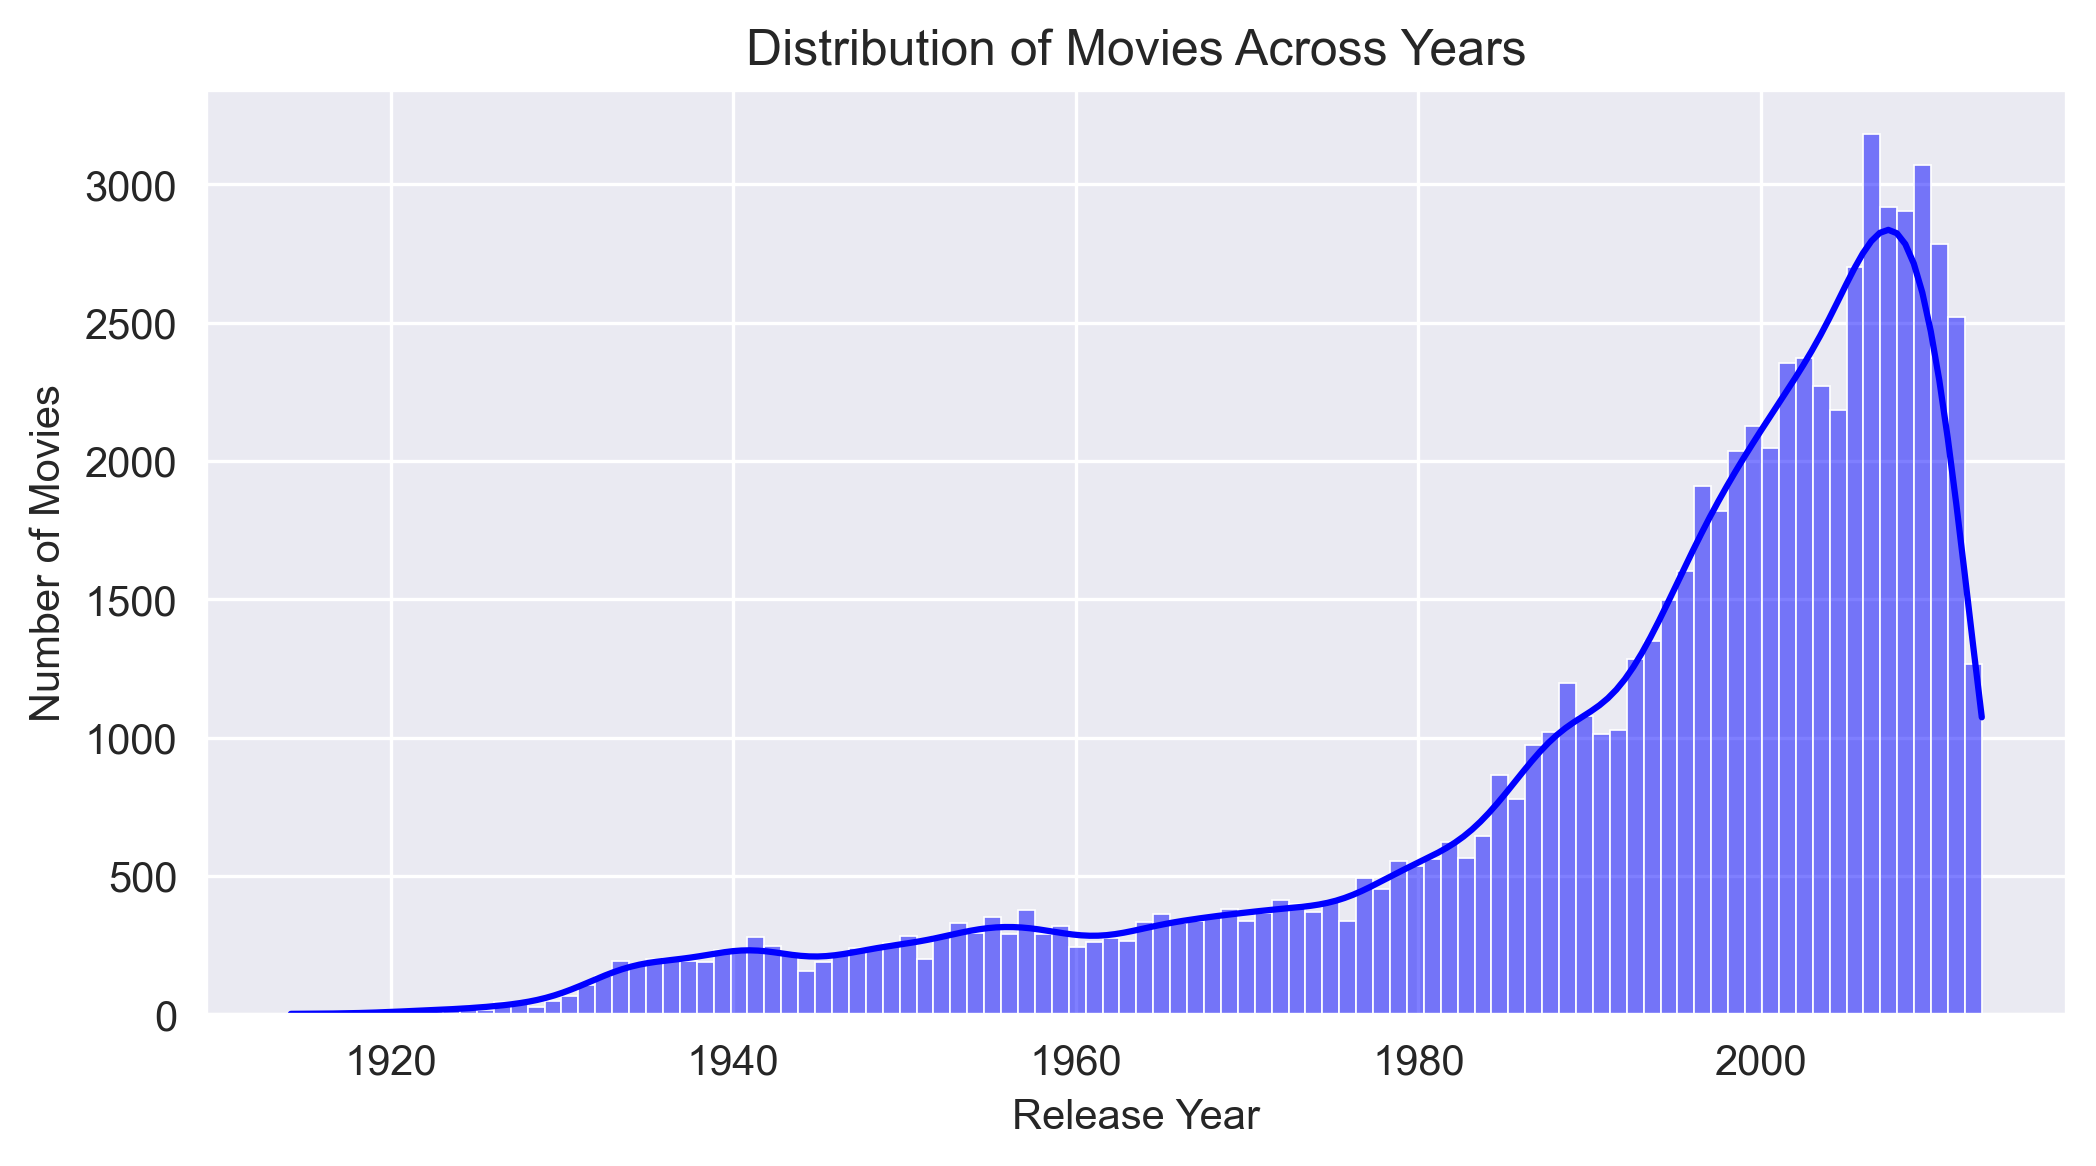

In [255]:
viz.visualize_year_distribution(movies)

## II.2 Missing values analysis

                            Missing Values  Percentage
writer_gender                        48289   67.441796
writer                               47278   66.029804
actor_ethni_fbid                     38115   53.232497
movie_bo_revenue                     29058   40.583232
character_name                       24456   34.155948
fbid_char                            24456   34.155948
producer_gender                      22429   31.324981
producer                             21503   30.031703
actor_age_at_movie_release            3905    5.453834
director_gender                       1735    2.423151
actor_date_of_birth                    588    0.821218
director                               242    0.337984
actor_gender                            66    0.092177


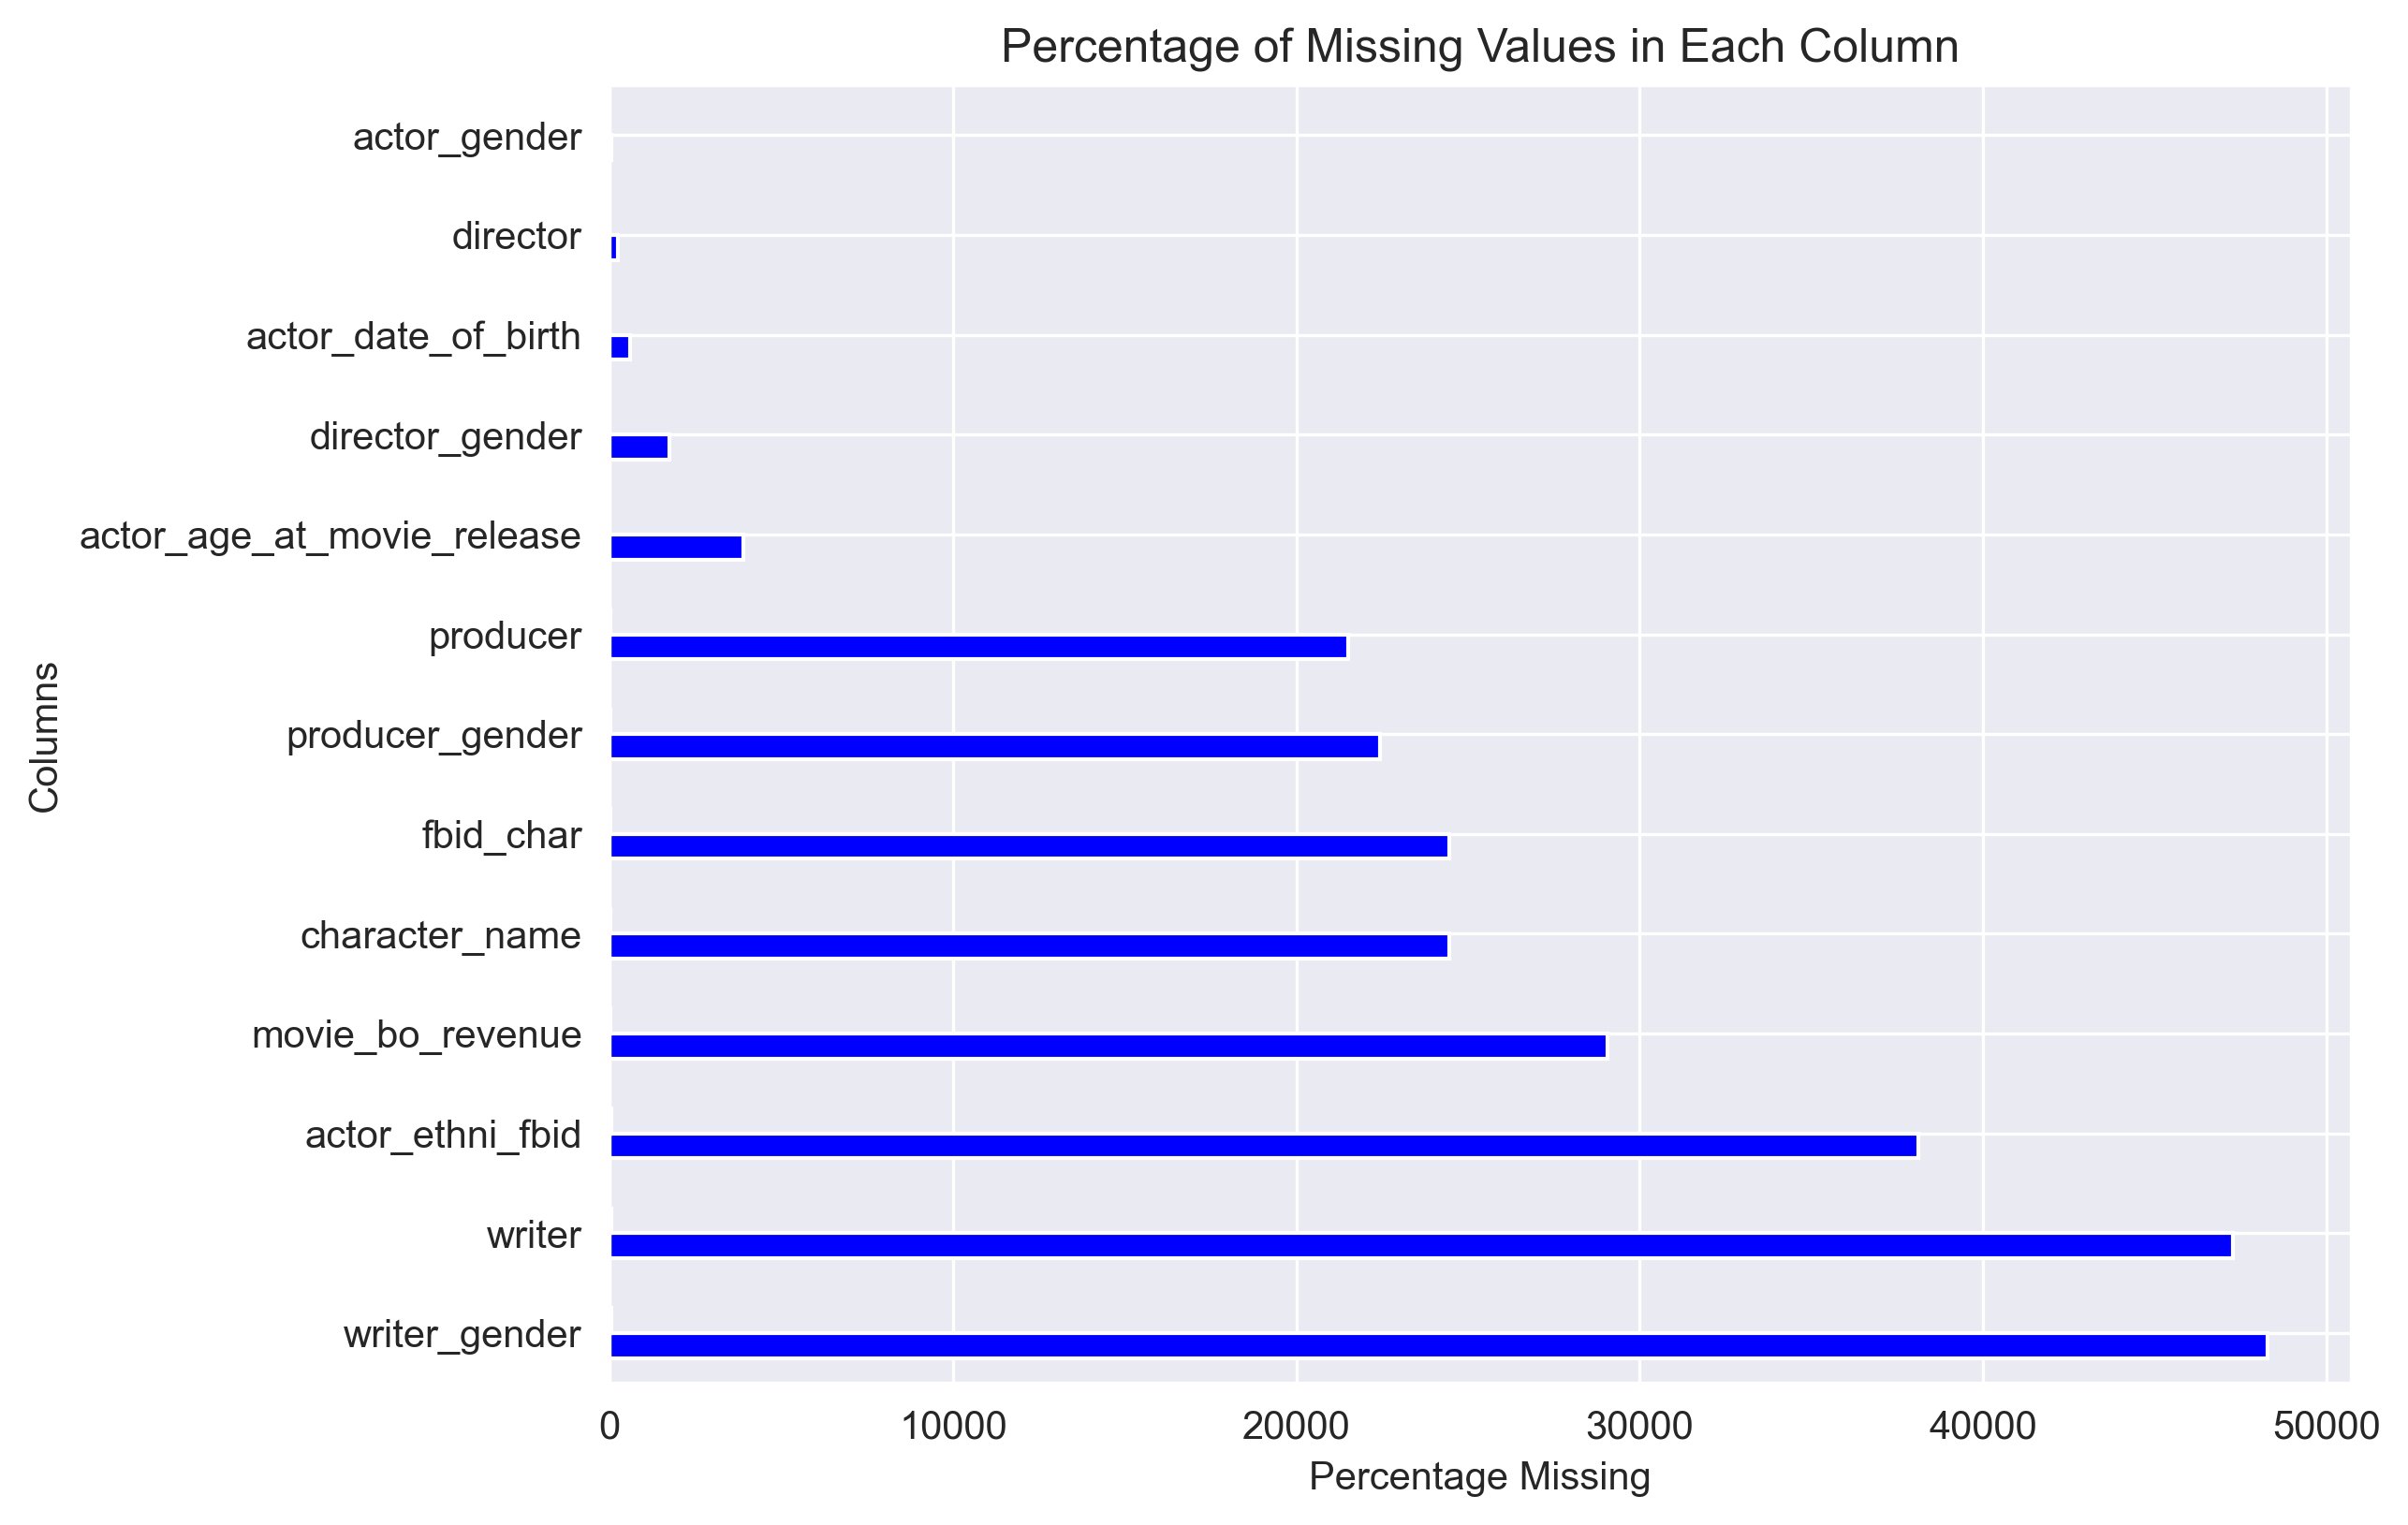

In [250]:
viz.visualize_missing_values(movies)

 Based on this analysis, drop columns with a lot of missing values  (according to a threshold, say 50%)

# II.3 Distribution of Key Features

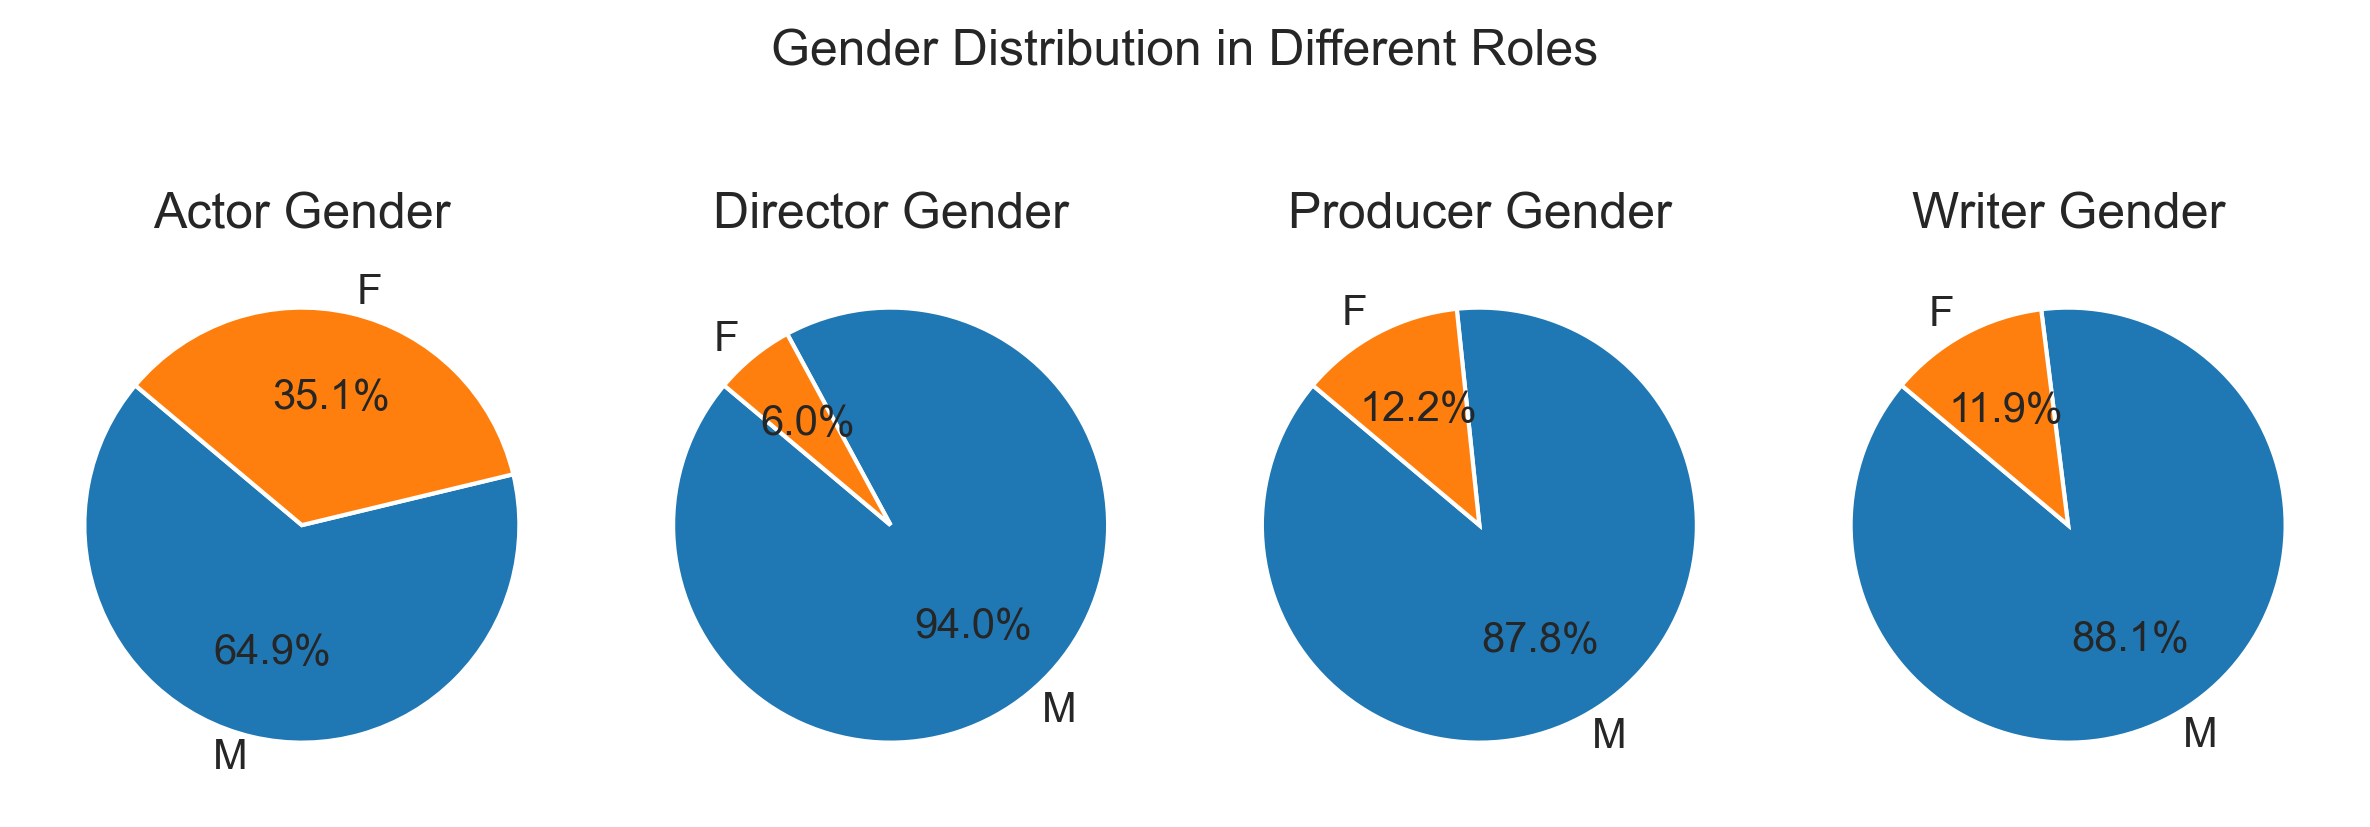

In [251]:
viz.visualize_gender_distribution(movies)

Todo: Explain

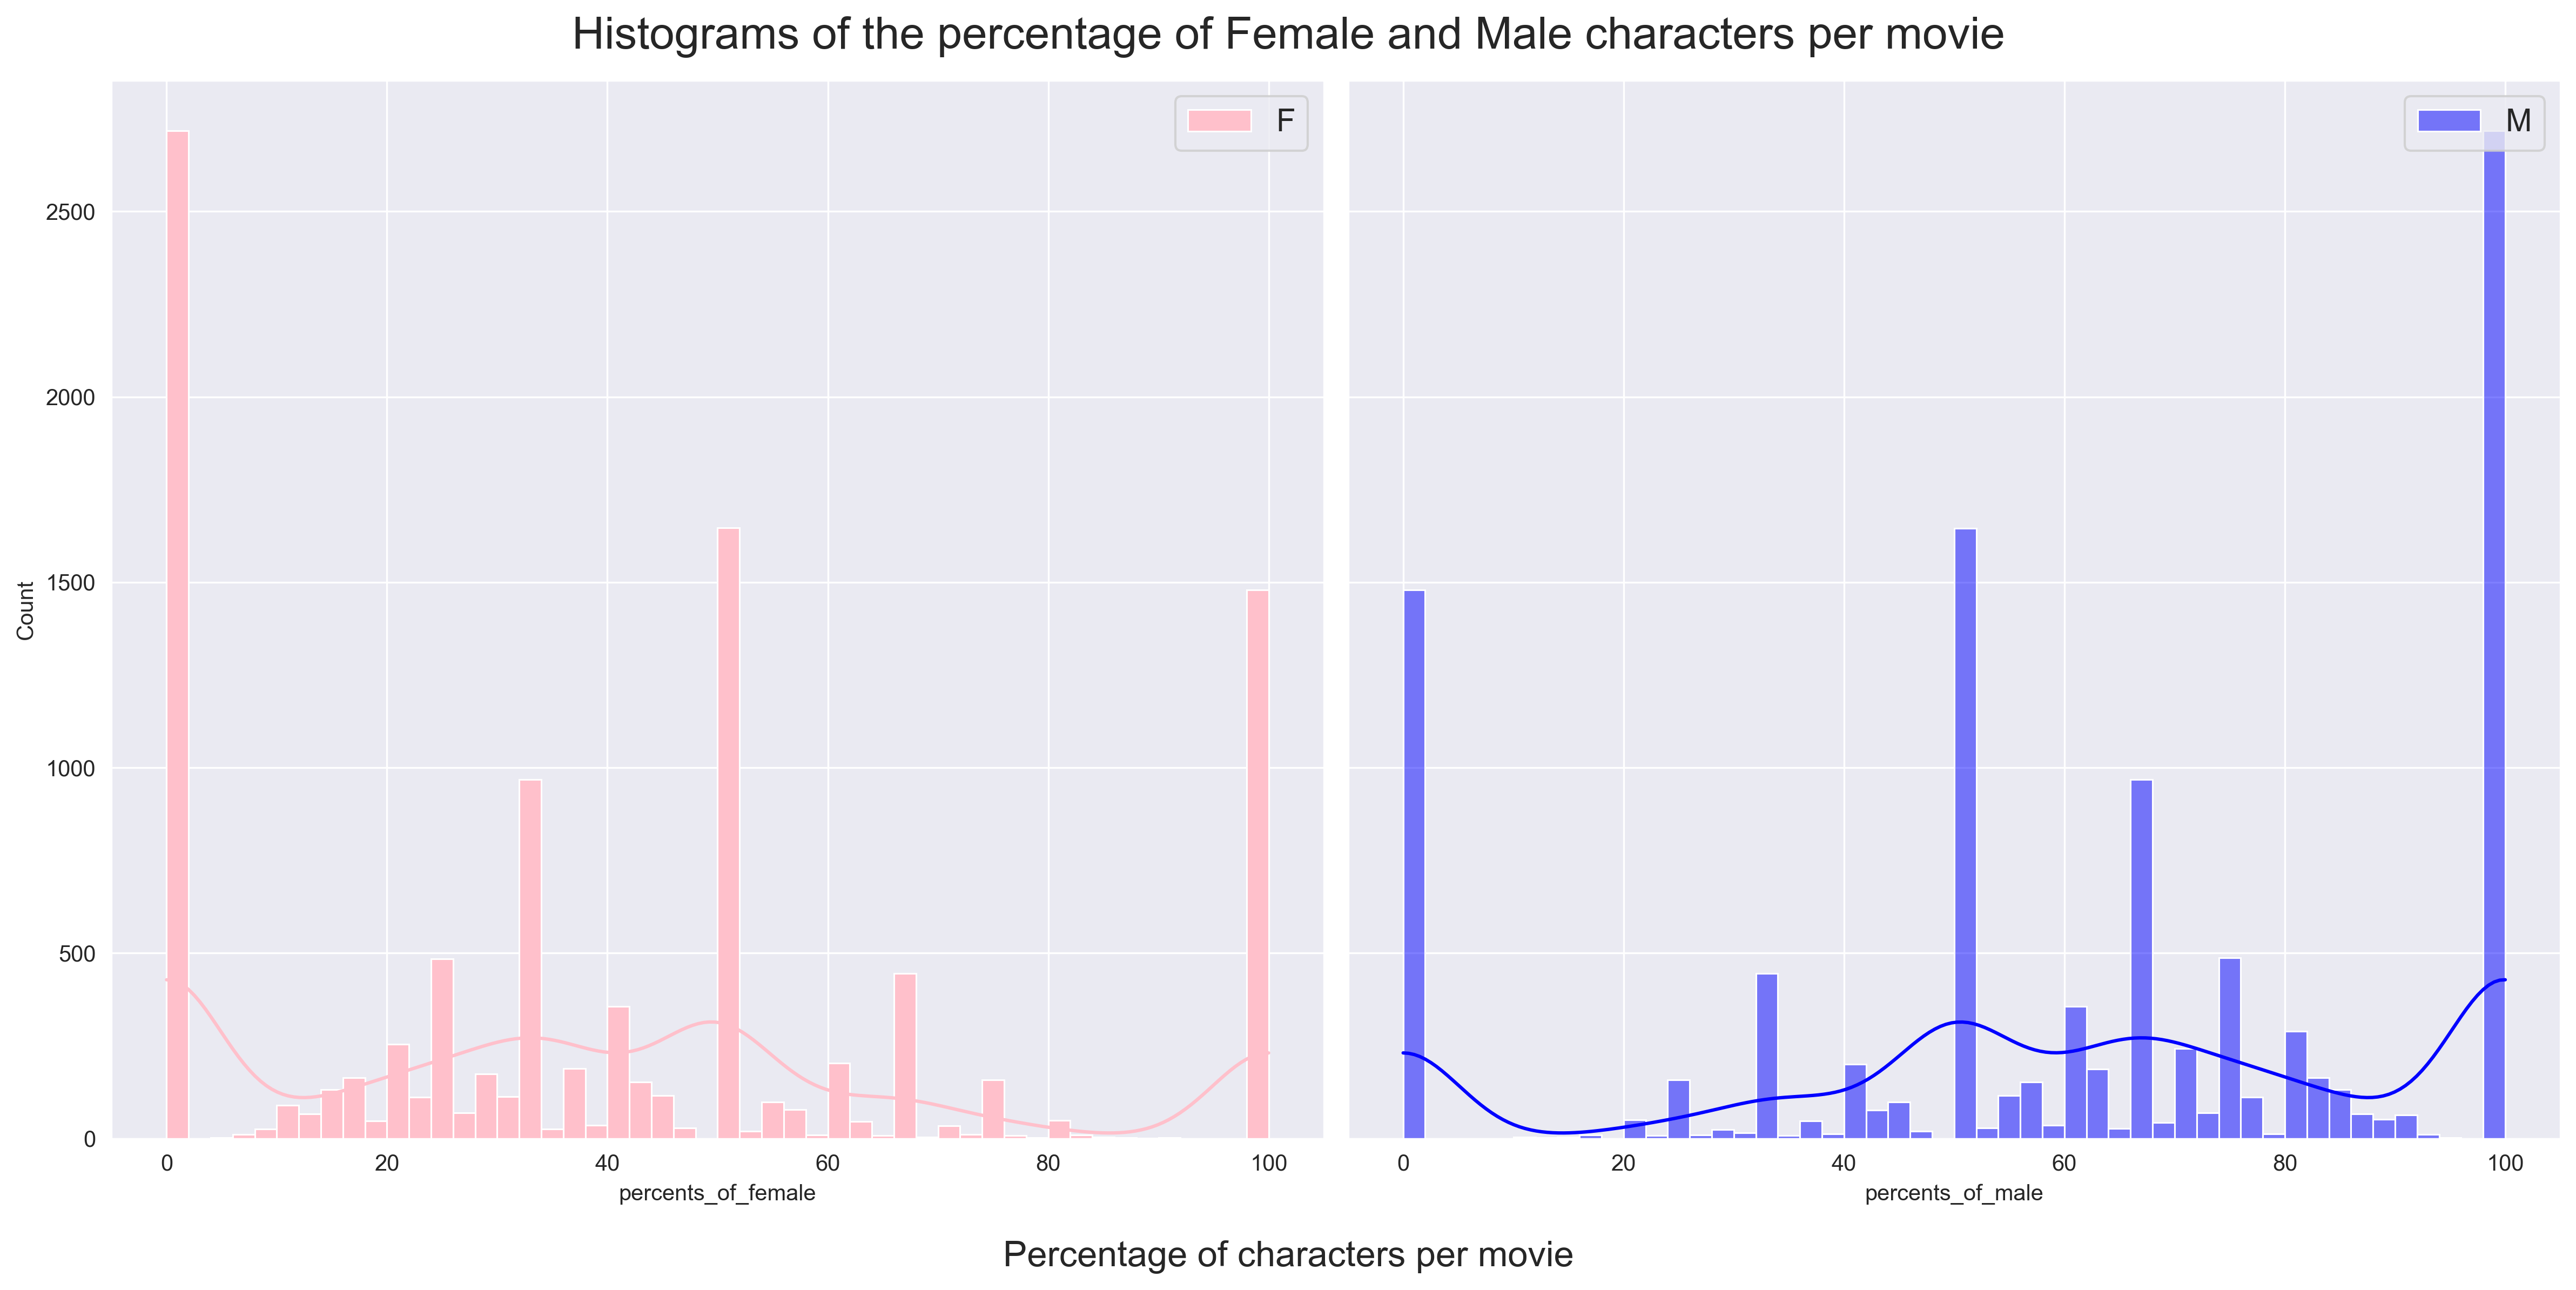

In [252]:
viz.visualize_gender_proportion_repartition(movies)

TODO: Explain